
\
# 1. Exploratory data analysis

In [22]:
# importing the modules
import numpy as np #for linear algebra
import pandas as pd
import seaborn as sns #forstastical graphs
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import IsolationForest

# Reading dataset

In [23]:
#readung the dataset
df = pd.read_csv('salary.csv')
df.head(10)

,profession,salary,Gender
0,Farming-fishing,226802,Male
1,Protective-serv,89814,Male
2,Machine-op-inspct,336951,Male
3,Business man,160323,Male
4,Other-service,103497,Female
5,Plumber,198693,Male
6,Prof-specialty,227026,Male
7,Other-service,104626,Male
8,Craft-repair,369667,Female
9,Machine-op-inspct,104996,Male


In [24]:
df.describe()

,salary
count,3.000000e+01
mean,2.013988e+06
std,8.176233e+06
min,4.331100e+04
25%,1.053580e+05
50%,1.874625e+05
75%,2.743230e+05
max,4.444444e+07


In [25]:
df.info() #to print the concise summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profession  30 non-null     object
 1   salary      30 non-null     int64 
 2   Gender      30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


<AxesSubplot:ylabel='salary'>

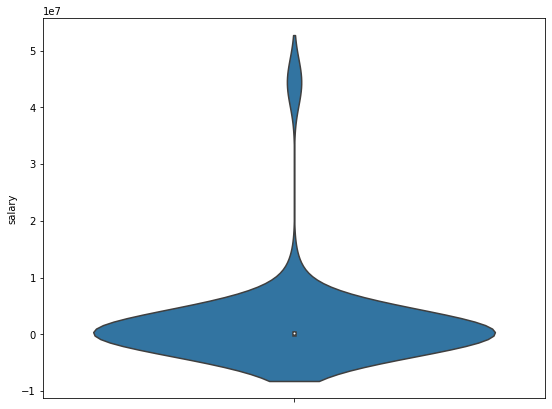

In [26]:
fig, ax = pyplot.subplots(figsize =(9, 7))
sns.violinplot( ax = ax, y = df["salary"] )

# 2.Define and Fit Model

In [27]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['salary']])

IsolationForest(contamination=0.1, n_estimators=50)

# 3.Add Scores and Anomaly Column

In [28]:
df['scores']=model.decision_function(df[['salary']])
df['anomaly']=model.predict(df[['salary']])
df.head(20)

,profession,salary,Gender,scores,anomaly
0,Farming-fishing,226802,Male,0.148385,1
1,Protective-serv,89814,Male,0.139405,1
2,Machine-op-inspct,336951,Male,0.074900,1
3,Business man,160323,Male,0.150954,1
4,Other-service,103497,Female,0.152247,1
5,Plumber,198693,Male,0.151203,1
6,Prof-specialty,227026,Male,0.148385,1
7,Other-service,104626,Male,0.154570,1
8,Craft-repair,369667,Female,0.021908,1
9,Machine-op-inspct,104996,Male,0.154570,1


# 4.Print Anomalies

In [29]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

        profession    salary Gender    scores  anomaly
16    Adm-clerical  44444444   Male -0.373366       -1
20   Other-service   8888888   Male -0.267885       -1
23  Prof-specialty   2222567   Male -0.192703       -1


# 5.Evaluating the model

In [31]:
outliers_counter = len(df[df['salary'] > 999999])
outliers_counter

3

In [32]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 100.0
